<a href="https://colab.research.google.com/github/iagoit/data_science/blob/main/An%C3%A1lise_de_Dados_Viol%C3%AAncia_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="75%" src="https://mediad.publicbroadcasting.net/p/shared/npr/styles/x_large/nprshared/202001/796050650.png"></center>

--- 

# Violencia no Rio de Janeiro

Rio de Janeiro é um município brasileiro, situado no Sudeste do país. Maior destino turístico internacional no Brasil, da América Latina e de todo o Hemisfério Sul, funcionando como um "espelho", ou "retrato" nacional, seja positiva ou negativamente. É a segunda maior metrópole do Brasil (depois de São Paulo). Sua população estimada pelo IBGE para 1.º de julho de 2020 era de 6 747 815 habitantes. Tem o epíteto de Cidade Maravilhosa e aquele que nela nasce é chamado de carioca.

É um dos principais centros econômicos, culturais e financeiros do país, sendo internacionalmente conhecida por diversos ícones culturais e paisagísticos, como o Pão de Açúcar, o morro do Corcovado com a estátua do Cristo Redentor, as praias dos bairros de Copacabana, Ipanema e Barra da Tijuca, entre outras; Representa o segundo maior PIB do país, e é sede das duas maiores empresas brasileiras - a Petrobras e a Vale, e das principais companhias de petróleo e telefonia do Brasil, além do maior conglomerado de empresas de mídia e comunicações da América Latina, o Grupo Globo.

Desde meados dos anos 1990, em decorrência da violência urbana, o Rio vem conquistando espaço na imprensa nacional e internacional. A cidade apresenta índices elevados de criminalidade, em especial, o homicídio.

---

**Neste *notebook*, iremos analisar os dados referentes à cidade Rio de Janeiro (até 2020) e dar enfase aos furtos de veiculos e homicídios, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção de Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas aqui divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

* No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)

* Todas as estatísticas do ISPDados podem ser encontradas [neste link](http://www.ispdados.rj.gov.br/estatistica.html)

* Dashboard Interativo pode ser acessado [neste link](http://www.ispvisualizacao.rj.gov.br/index.html)


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np

In [ ]:
# importar o arquivo

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise dos Dados

Agora iremos conhecer nosso dataset e prepara-lo para caso seja necessario realizar uma limpeza e tratamento dos dados.

In [ ]:
# preview das colunas do dataset

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Vamos identificar a dimensão do dataset para que possamos ter uma visão mais clara.

In [ ]:
# identificar o vlolume de dados do df

print("-> Entradas:\t {}".format(df.shape[0]))
print("-> Variáveis:\t {}".format(df.shape[1]))

-> Entradas:	 344
-> Variáveis:	 56


Conseguimos identificar a dimensão do dataset, no caso, `344 entradas(linhas)` e `56 variáveis(colunas)`. 

Agora que ja temos as dimensões do dataset iremos verificar as colunas do dataset.

In [ ]:
# identificar as colunas do dataset

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora que ja temos as entradas e a identificação de cada coluna, é importante entender o tipo de cada coluna.

É importante realizar essa etapa para facilitar na etapa de limpeza de dados.

In [ ]:
# identificar os tipos de cada coluna

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Agora temos a informação que possuimos apenas variáveis `int` e `float`.

### Qual a porcentagem de valores ausentes no dataset ?



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Agora já temos a informação que os valores ausentes no dataset estão relacionados a bicicletas(furto e roubo) e as drogas(apreensão e posse).

Mas como o dataset possui informações desde 1991, podemos realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Mas também podemos analisar os dados da seguinte forma:

* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)


## Informações Estatísticas da Violência no Rio de Janeiro




Agora que já temos a porcentagem de valores ausentes, iremos utilizar o método `describe()` para visualizar as distribuições estatísticas do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [ ]:
# mostrar os valores estatísticos do dataframe

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio 

Os crimes contra o patrimônio são aqueles que atentam diretamente contra o patrimônio de uma pessoa ou organização. Considera-se patrimônio de uma pessoa física ou organização os seus bens, o poderio econômico e, entre outros, a universalidade de direitos que tenham expressão econômica para seu proprietário. (Fonte [LFG](https://www.lfg.com.br/conteudos/artigos/geral/crimes-contra-o-patrimonio#:~:text=Os%20crimes%20contra%20o%20patrim%C3%B4nio,express%C3%A3o%20econ%C3%B4mica%20para%20seu%20propriet%C3%A1rio.))

#### Veículos

Agora iremos focar em analisar as variáveis `roubo_veiculo`, `furto_veiculo` e `recuperacao_veiculos`.

Mas antes de iniciar a analise das variáveis iremos fazer um código que consiga juntar as colunas de `vano` e `mes` convertendo-a em `datetime` 

In [ ]:
# conversão vano e mes

df['data'] = df['mes'].astype(str) + '/' + df['vano'].astype(str)
df['data'] = pd.to_datetime(df['data'], format='%m/%Y')
df['data'] = df['data'].dt.to_period('M')

In [ ]:
# média da variável roubo_veiculo

mean_roubo_veiculo = df.roubo_veiculo.mean()
print("Roubos de veículos por mês:", round(mean_roubo_veiculo,2))

Roubos de veículos por mês: 2448.7


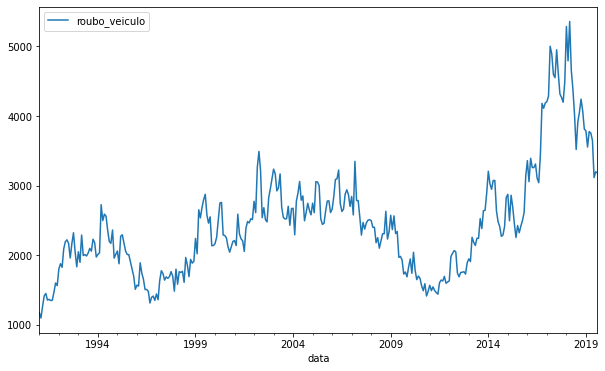

In [ ]:
# plot de grafico que mostra a curva da variável roubo_veículo

df.plot(x='data', y='roubo_veiculo', figsize=(10,6));

In [ ]:
# média da variável furto_veiculos

mean_furto_veiculos = df.furto_veiculos.mean()
print("Furtos de veículos por mês:", round(mean_furto_veiculos,2))

Furtos de veículos por mês: 1674.67


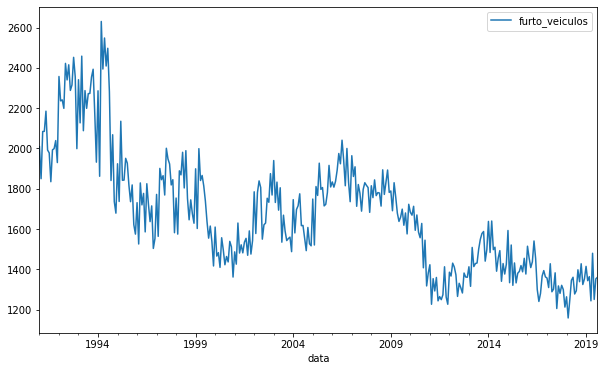

In [ ]:
# plot de grafico que mostra a curva da variável furto_veículos

df.plot(x='data', y='furto_veiculos', figsize=(10,6));

Com isso conseguimos concluir que a média de roubo de veículos por mês é de `2448.7` e a média de furto de veículos por mês é de `1674.67`.

In [ ]:
# média da variável recuperacao_veiculos

mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

# total de veículos perdidos

total = mean_roubo_veiculo + mean_furto_veiculos
print("Média de veículos perdidos por mês: {:.2f}".format(total))
print("Veículos recuperados por mês: {:.2f}".format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados

vr = mean_recuperacao_veiculos/total*100
print("{:.2f}% dos veículos roubados ou furtados foram recuperados.".format(vr))


Média de veículos perdidos por mês: 4123.37
Veículos recuperados por mês: 1772.24
42.98% dos veículos roubados ou furtados foram recuperados.


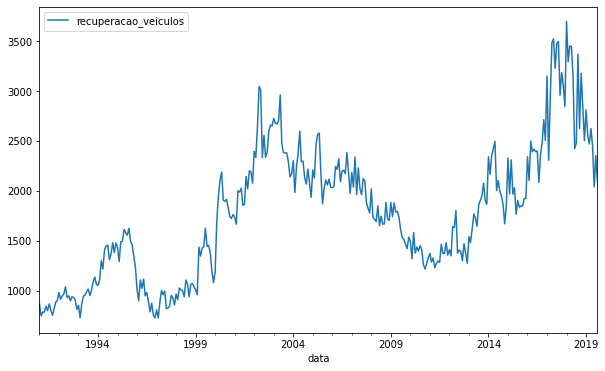

In [ ]:
# plot de grafico que mostra a curva da variável recupecao_veiculos

df.plot(x='data', y='recuperacao_veiculos', figsize=(10,6));

### Crimes Contra a Vida

Agora iremos analisar a variável relacionada ao homicidio doloso(`hom_doloso`).

In [ ]:
# valores max e min de hom_doloso

max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimindo valores max e min

print('Min:{}'.format(min_hom_doloso))
print('Max:{}'.format(max_hom_doloso))

Min:272
Max:831


Conseguimos identificar que o min da variável hom_doloso é `272` e o max é `831`.

Mas vamos continuar entendendo esses dados para ver se os crimes aumentaram ou diminuiram conforme o tempo passou.

In [ ]:
# verificando o min

df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# verifica o max

df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Com isso conseguimos identificar que a maior taxa de homicidio doloso foi em `1995` e a menor taxa foi em `2015`, com isso conseguimos concluir que com o passar dos anos a taxa de homicidio doloso vem diminuindo.

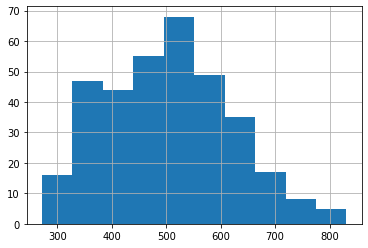

In [ ]:
# histograma de hom_doloso

df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.
* O histograma está inclinando-se para a direita, embora a média e a mediana tenham valores semelhantes, como visto acima quando usamos o método de descrição.

## Conclusão

Com isso finalizamos nossas analises de alguns crimes pertinentes no estado do Rio de Janeiro. É possivel realizar uma analise ainda mais profundas com ferramentas mais avançadas e ter outros insights ainda melhores.

E com isso conseguimos identificar que:

* A quantidade de roubos e furtos por mês no Rio de Janeiro.
* A taxa de recuperação de veículos.
* Percebemos que com o roubo de veículos é mais frequente do que o furto de veículos. Mas também a taxa de recuperação de veículos vem crescendo conforme os anos.
* O mínimo e o máximo de taxa de homicídios doloso.
* Também conseguimos identificar que a taxa de homicídios vem diminuindo conforme os anos.
